# Visualização de Dados

**Objetivo**: Apresentar os conceitos e ferramentas para visualização de dados.

## 1. Preparação

A visualização de dados é fundamental para entender e comunicar informações contidas nos dados. Neste notebook, exploraremos várias técnicas de visualização usando bibliotecas populares em Python.

In [1]:
# Visualização de Dados em Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_point, geom_smooth, geom_histogram, geom_boxplot, facet_wrap
from plotnine import theme_minimal, labs, scale_fill_brewer, scale_color_brewer
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
from bokeh.layouts import column, row
from bokeh.transform import factor_cmap
import matplotlib.animation as animation
from IPython.display import HTML, display
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
from datetime import datetime

# Configurações iniciais para melhorar a visualização
plt.style.use('seaborn-v0_8-whitegrid')

## 2. Carregando e Explorando o Conjunto de Dados Iris

In [2]:
# Carregando o dataset Iris
try:
    # Tentar carregar o arquivo local
    df_iris = pd.read_csv('iris.csv')
except FileNotFoundError:
    # Se não existir, usar o dataset do seaborn
    print("Arquivo 'iris.csv' não encontrado. Carregando dataset Iris do Seaborn.")
    iris_sns_data = sns.load_dataset("iris")
    df_iris = iris_sns_data.rename(columns={
        'sepal_length': 'Sepal.Length',
        'sepal_width': 'Sepal.Width',
        'petal_length': 'Petal.Length',
        'petal_width': 'Petal.Width',
        'species': 'Species'
    })

Arquivo 'iris.csv' não encontrado. Carregando dataset Iris do Seaborn.


In [3]:
# Visualizando as primeiras linhas
print("Primeiras 5 linhas do dataset:")
display(df_iris.head())

Primeiras 5 linhas do dataset:


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Informações básicas sobre o dataset
print("\nInformações do dataset:")
df_iris.info()


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(df_iris.describe())


Estatísticas descritivas:


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Contagem de espécies
print("\nDistribuição das espécies:")
display(df_iris['Species'].value_counts())


Distribuição das espécies:


Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
# Verificando valores ausentes
print("\nValores ausentes por coluna:")
display(df_iris.isnull().sum())


Valores ausentes por coluna:


Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [8]:
# Criando também uma versão com nomes de colunas padronizados para Plotly
df_iris_renamed = df_iris.copy()
if 'sepal_length' not in df_iris_renamed.columns: # Checa se a renomeação é necessária
    df_iris_renamed = df_iris_renamed.rename(columns={
        'Sepal.Length': 'sepal_length',
        'Sepal.Width': 'sepal_width',
        'Petal.Length': 'petal_length',
        'Petal.Width': 'petal_width',
        'Species': 'species'
    })
elif 'Species' in df_iris_renamed.columns and 'species' not in df_iris_renamed.columns:
    # Se as colunas já são snake_case, mas Species não é, apenas renomeia Species
    df_iris_renamed = df_iris_renamed.rename(columns={'Species': 'species'})

display(df_iris_renamed.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Visualização Estática com Matplotlib e Seaborn

### 3.1 Matplotlib: Fundamentos

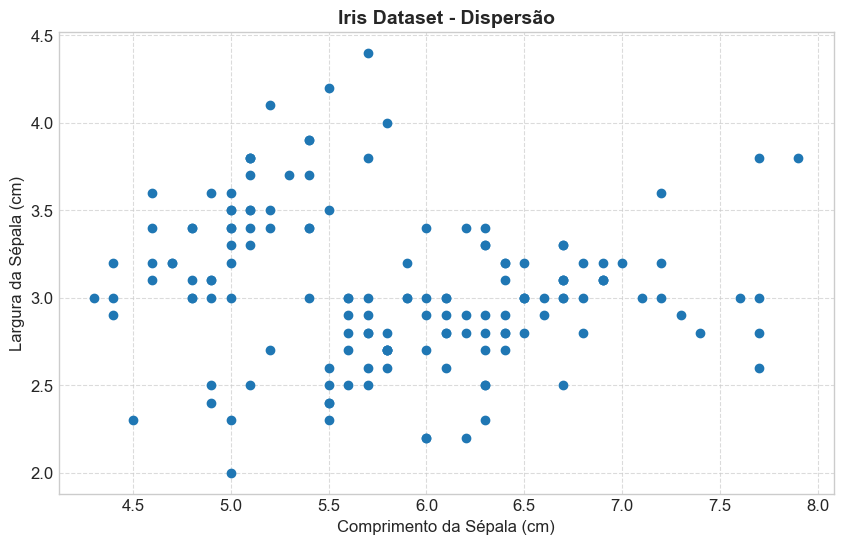

In [9]:
# Configuração para melhorar a qualidade visual dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')  # Estilo visual limpo e profissional
plt.rcParams['figure.figsize'] = (10, 6)  # Tamanho padrão da figura
plt.rcParams['font.size'] = 12  # Tamanho da fonte para melhor legibilidade

# Gráfico de Dispersão (Scatter Plot) básico
fig, ax = plt.subplots()
ax.scatter(df_iris['Sepal.Length'], df_iris['Sepal.Width'])
ax.set_title('Iris Dataset - Dispersão', fontsize=14, fontweight='bold')
ax.set_xlabel('Comprimento da Sépala (cm)')
ax.set_ylabel('Largura da Sépala (cm)')
ax.grid(True, linestyle='--', alpha=0.7)  # Adiciona grid para facilitar leitura
plt.show()

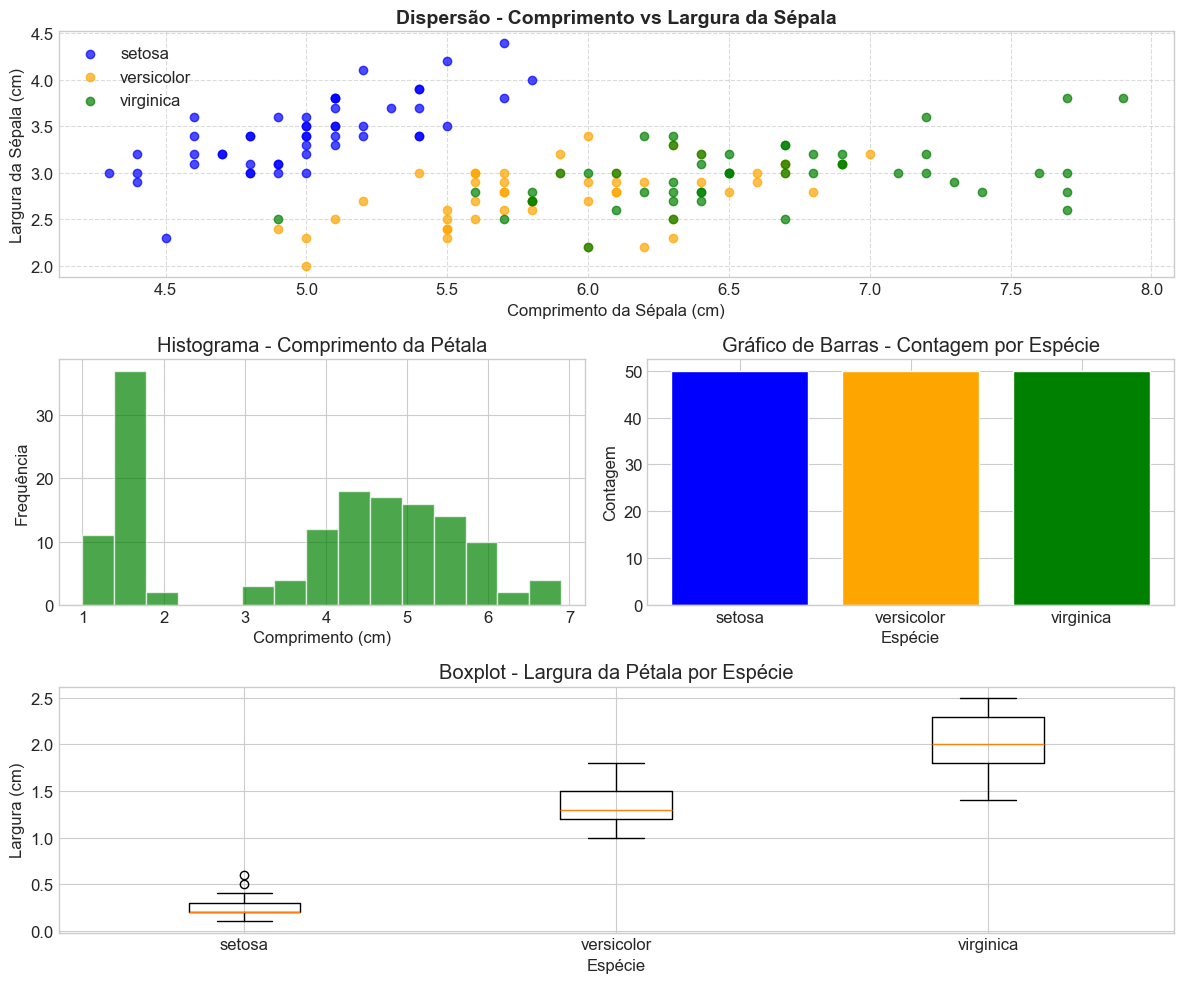

In [10]:
# Criação de uma figura com subplots organizados em grid
fig = plt.figure(figsize=(12, 10))

# Definindo o layout de subplots
gs = fig.add_gridspec(3, 2)  # 3 linhas, 2 colunas

# Gráfico de Dispersão com cores por espécie (ocupando duas colunas)
ax1 = fig.add_subplot(gs[0, :])  # Primeira linha, todas as colunas
for species, color in zip(df_iris['Species'].unique(), ['blue', 'orange', 'green']):
    subset = df_iris[df_iris['Species'] == species]
    ax1.scatter(subset['Sepal.Length'], subset['Sepal.Width'],
                label=species, color=color, alpha=0.7)
ax1.set_title('Dispersão - Comprimento vs Largura da Sépala', fontsize=14, fontweight='bold')
ax1.set_xlabel('Comprimento da Sépala (cm)')
ax1.set_ylabel('Largura da Sépala (cm)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Histograma
ax2 = fig.add_subplot(gs[1, 0])  # Segunda linha, primeira coluna
ax2.hist(df_iris['Petal.Length'], bins=15, alpha=0.7, color='green')
ax2.set_title('Histograma - Comprimento da Pétala')
ax2.set_xlabel('Comprimento (cm)')
ax2.set_ylabel('Frequência')

# Gráfico de Barras
ax3 = fig.add_subplot(gs[1, 1])  # Segunda linha, segunda coluna
species_counts = df_iris['Species'].value_counts()
species = species_counts.index
counts = species_counts.values
ax3.bar(species, counts, color=['blue', 'orange', 'green'])
ax3.set_title('Gráfico de Barras - Contagem por Espécie')
ax3.set_xlabel('Espécie')
ax3.set_ylabel('Contagem')

# Boxplot
ax4 = fig.add_subplot(gs[2, :])  # Terceira linha, todas as colunas
ax4.boxplot([df_iris[df_iris['Species'] == sp]['Petal.Width'] for sp in
             df_iris['Species'].unique()],
            tick_labels=df_iris['Species'].unique())
ax4.set_title('Boxplot - Largura da Pétala por Espécie')
ax4.set_xlabel('Espécie')
ax4.set_ylabel('Largura (cm)')

# Ajuste do layout para evitar sobreposição
plt.tight_layout()
plt.show()

### 3.2 Matplotlib: Personalização Avançada

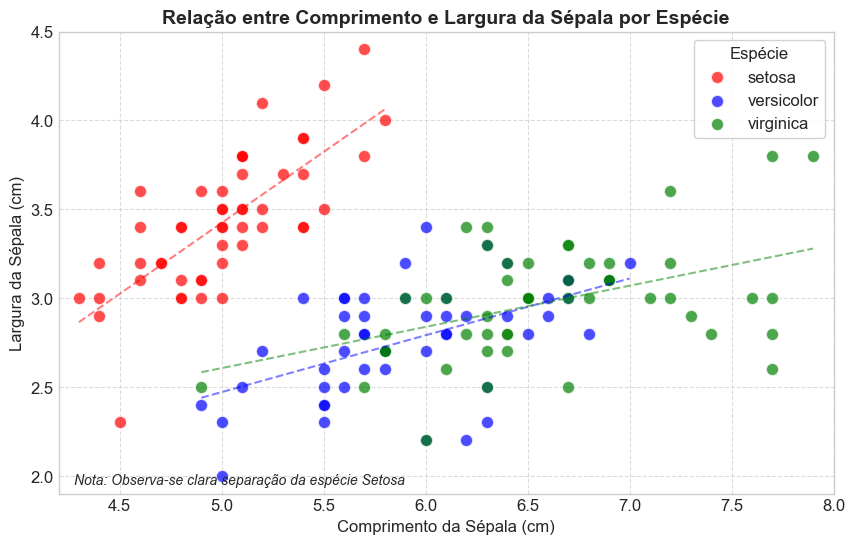

In [11]:
# Gráfico com personalização avançada
fig, ax = plt.subplots(figsize=(10, 6))

# Criando um scatterplot com cores diferentes por espécie
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
for species_name, group in df_iris.groupby('Species'): # Corrigido para species_name
    ax.scatter(group['Sepal.Length'], group['Sepal.Width'],
              label=species_name, color=colors[species_name.lower()],
              alpha=0.7, edgecolors='w', s=80)

# Adicionando grade
ax.grid(True, linestyle='--', alpha=0.7)

# Personalizando eixos
ax.set_xlabel('Comprimento da Sépala (cm)', fontsize=12)
ax.set_ylabel('Largura da Sépala (cm)', fontsize=12)
ax.set_title('Relação entre Comprimento e Largura da Sépala por Espécie',
            fontsize=14, fontweight='bold')

# Adicionando legenda com sombreamento e posição customizada
ax.legend(title='Espécie', title_fontsize=12,
         loc='upper right', frameon=True, framealpha=0.9)

# Adicionando texto explicativo
ax.text(0.02, 0.02, 'Nota: Observa-se clara separação da espécie Setosa',
       transform=ax.transAxes, fontsize=10, style='italic')

# Ajustando limites dos eixos para melhor visualização
ax.set_xlim(df_iris['Sepal.Length'].min() - 0.1, df_iris['Sepal.Length'].max() + 0.1)
ax.set_ylim(df_iris['Sepal.Width'].min() - 0.1, df_iris['Sepal.Width'].max() + 0.1)

# Adicionando linha de regressão para cada espécie
for species_name, group in df_iris.groupby('Species'): # Corrigido para species_name
    x_val = group['Sepal.Length'] # Corrigido para x_val
    y_val = group['Sepal.Width']  # Corrigido para y_val
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_val, y_val)
    x_range = np.linspace(x_val.min(), x_val.max(), 100)
    ax.plot(x_range, intercept + slope * x_range,
           '--', color=colors[species_name.lower()], alpha=0.5)

plt.show()

### 3.3 Seaborn: Visualização Estatística

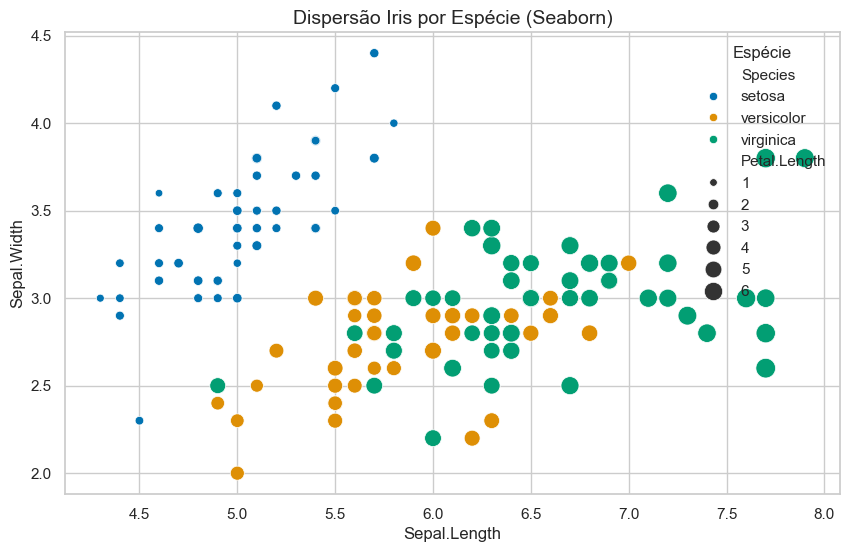

In [12]:
# Definindo estilo visual
sns.set_theme(style="whitegrid", palette="pastel")

# Gráfico de Dispersão com diferenciação por espécie
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='Species', size='Petal.Length',
               sizes=(30, 200), palette="colorblind", data=df_iris)
plt.title('Dispersão Iris por Espécie (Seaborn)', fontsize=14)
plt.legend(title='Espécie', title_fontsize=12)
plt.show()

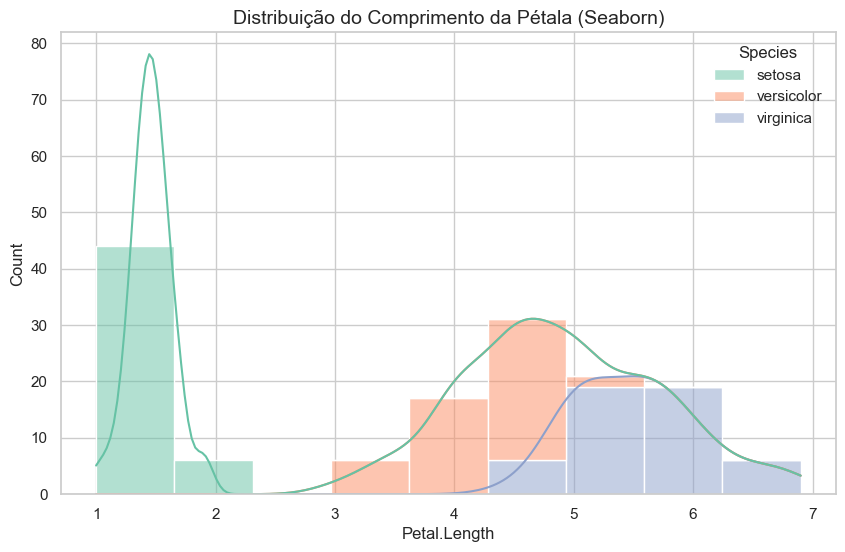

In [13]:
# Histograma com Estimativa de Densidade do Kernel (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_iris, x='Petal.Length', hue='Species', kde=True,
            multiple="stack", palette="Set2")
plt.title('Distribuição do Comprimento da Pétala (Seaborn)', fontsize=14)
plt.show()

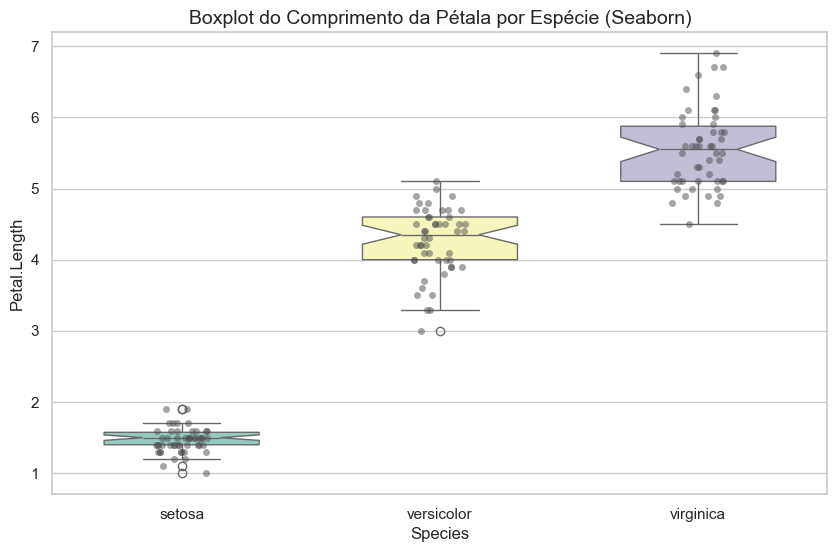

In [14]:
# Boxplot para comparar distribuições com pontos individuais
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Petal.Length', data=df_iris, hue='Species', palette="Set3",
           width=0.6, notch=True, legend=False)
sns.stripplot(x='Species', y='Petal.Length', data=df_iris,
             size=5, color=".3", linewidth=0, alpha=0.5)
plt.title('Boxplot do Comprimento da Pétala por Espécie (Seaborn)', fontsize=14)
plt.show()


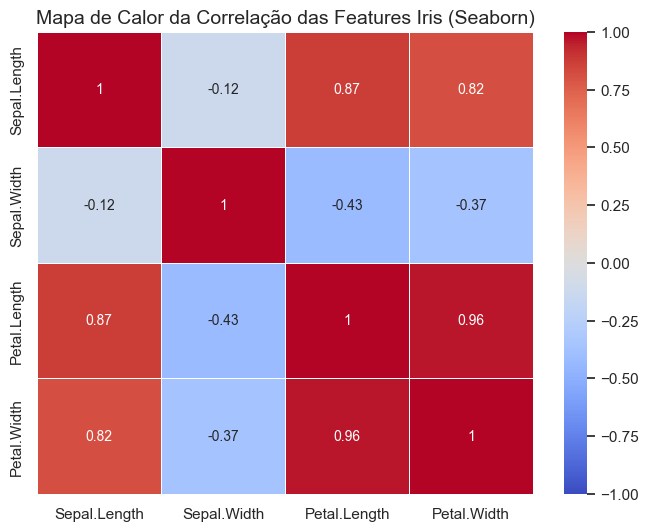

In [15]:
# Heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
df_iris_numeric = df_iris.select_dtypes(include=np.number)
correlation_matrix = df_iris_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
           linewidths=0.5, annot_kws={"size": 10})
plt.title('Mapa de Calor da Correlação das Features Iris (Seaborn)', fontsize=14)
plt.show()

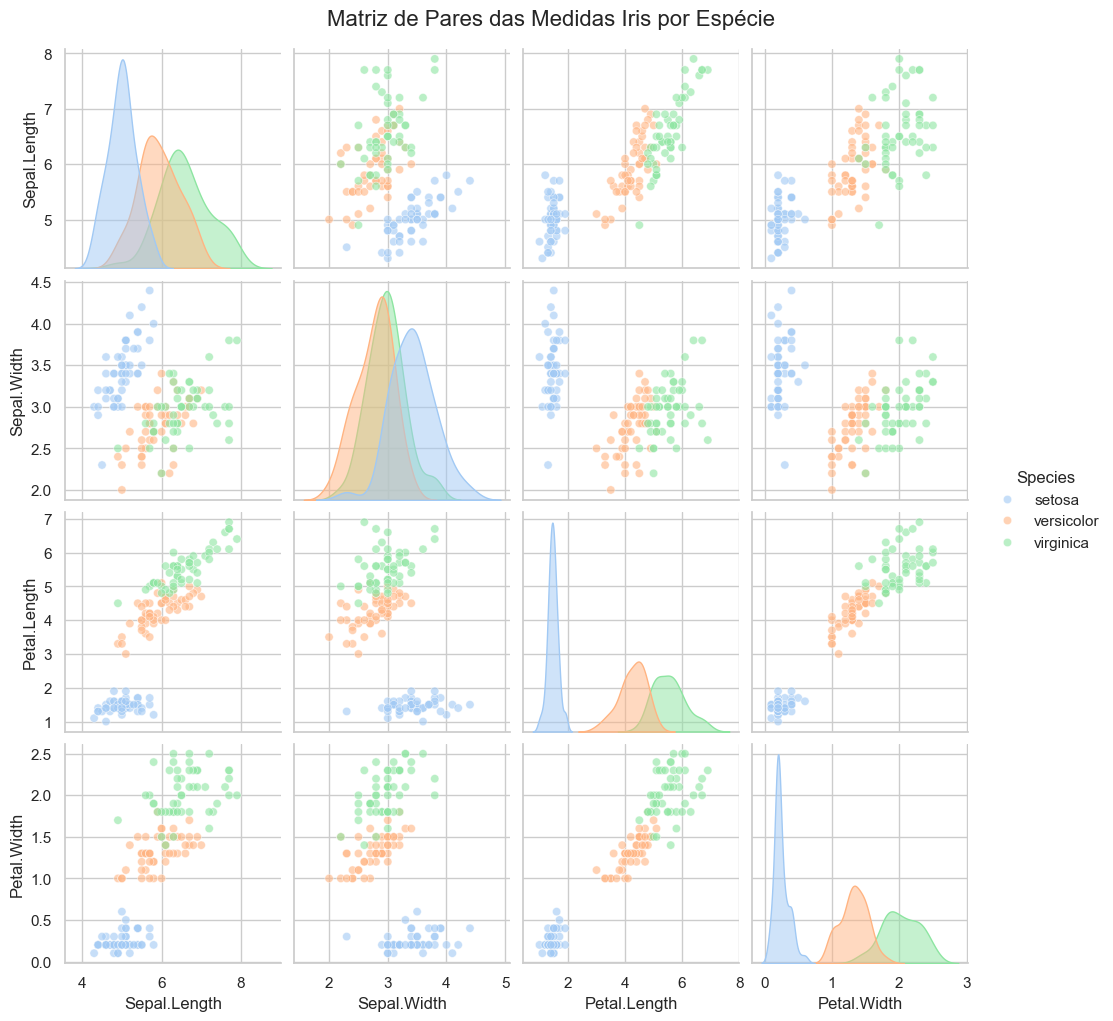

In [16]:
# Pairplot - Matriz de gráficos de dispersão
sns.pairplot(df_iris, hue='Species', height=2.5, diag_kind="kde",
            plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.5})
plt.suptitle('Matriz de Pares das Medidas Iris por Espécie', y=1.02, fontsize=16)
plt.show()

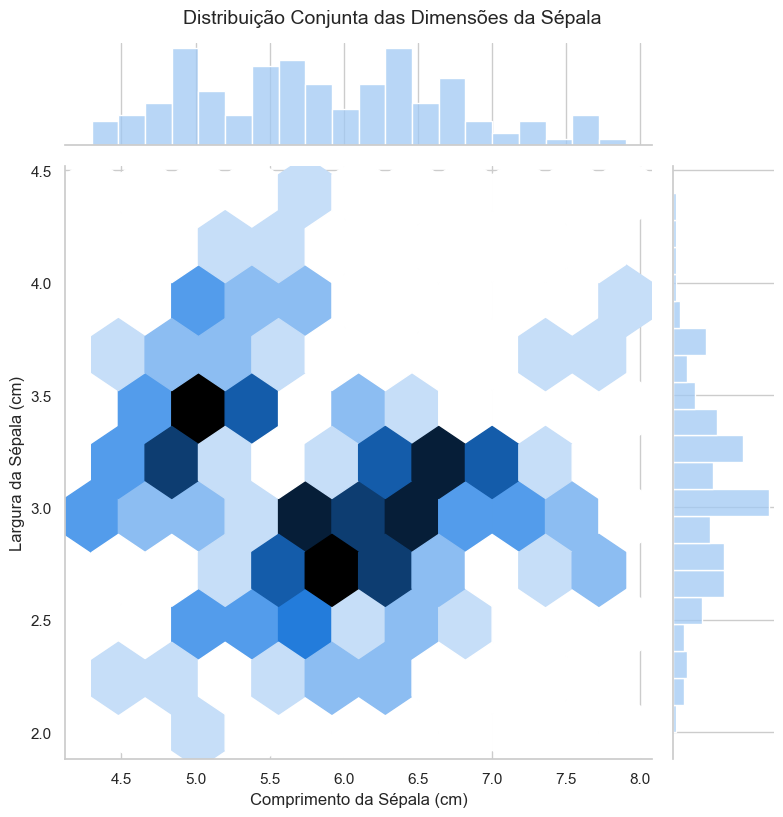

In [17]:
# JointPlot - Distribuição bivariada
g = sns.jointplot(x="Sepal.Length", y="Sepal.Width", data=df_iris, kind='hex',
                 marginal_kws=dict(bins=20, fill=True), height=8)
g.set_axis_labels('Comprimento da Sépala (cm)', 'Largura da Sépala (cm)', fontsize=12)
g.fig.suptitle('Distribuição Conjunta das Dimensões da Sépala', y=1.02, fontsize=14)
plt.show()

### 3.4 Funcionalidades de Plotagem do Pandas

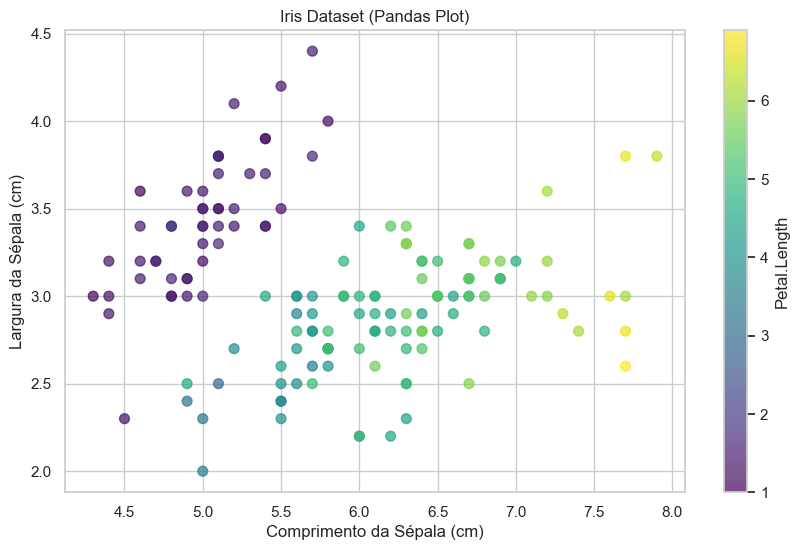

In [18]:
# Gráfico de dispersão direto do DataFrame Pandas
# plt.figure(figsize=(10, 6)) # Pandas plot cria sua própria figura
ax_pandas_scatter = df_iris.plot.scatter(x='Sepal.Length', y='Sepal.Width', c='Petal.Length',
                                        colormap='viridis', s=50, alpha=0.7,
                                        title='Iris Dataset (Pandas Plot)', figsize=(10,6))
ax_pandas_scatter.set_xlabel('Comprimento da Sépala (cm)')
ax_pandas_scatter.set_ylabel('Largura da Sépala (cm)')
# A colorbar é um pouco mais complexa de adicionar diretamente aqui de forma elegante com o wrapper pandas.
# Se a colorbar for crucial, usar matplotlib diretamente oferece mais controle.
plt.show()

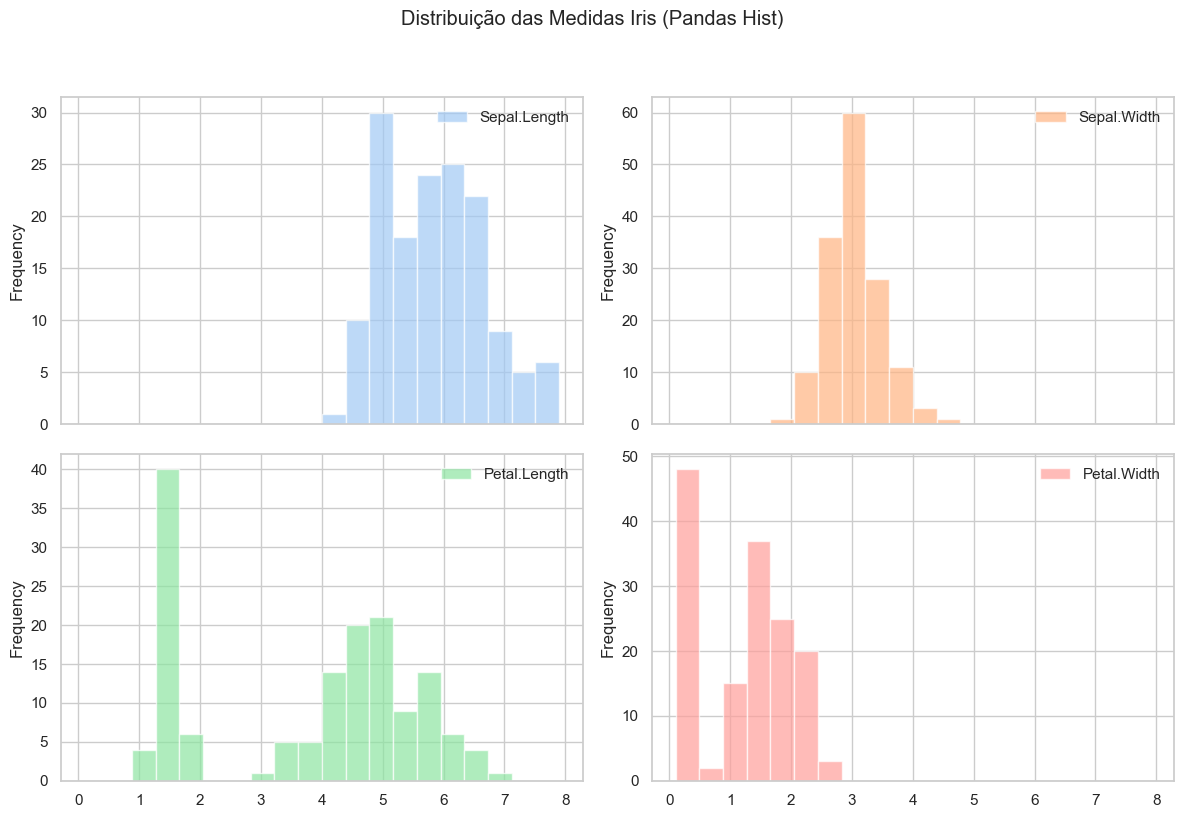

In [19]:
# Histograma para todas as colunas numéricas
df_iris_numeric.plot.hist(subplots=True, layout=(2, 2), figsize=(12, 8), bins=20,
                         alpha=0.7, grid=True)
plt.suptitle('Distribuição das Medidas Iris (Pandas Hist)', y=1.02) # Adicionar suptitle
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajustar para suptitle
plt.show()

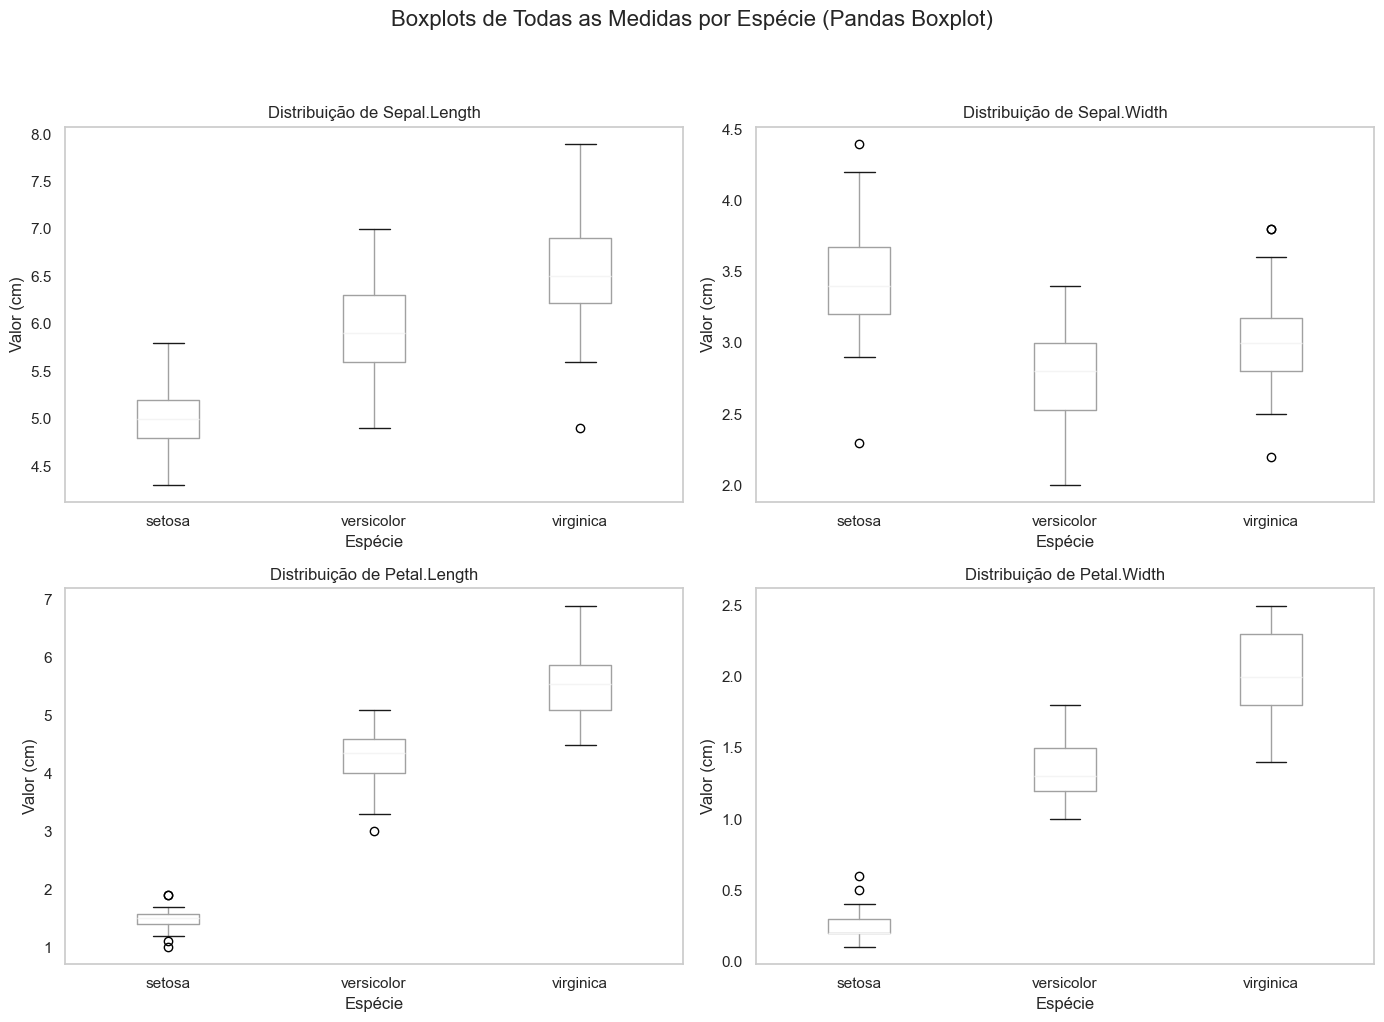

In [20]:
# Boxplot para todas as colunas numéricas por espécie
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
measures = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
for i, measure in enumerate(measures):
    row, col = i // 2, i % 2
    df_iris.boxplot(column=measure, by='Species', ax=axes[row, col], grid=False)
    axes[row, col].set_title(f'Distribuição de {measure}')
    axes[row, col].set_xlabel('Espécie')
    axes[row, col].set_ylabel('Valor (cm)')
plt.suptitle('Boxplots de Todas as Medidas por Espécie (Pandas Boxplot)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## 4. Visualização com Gramática dos Gráficos: plotnine

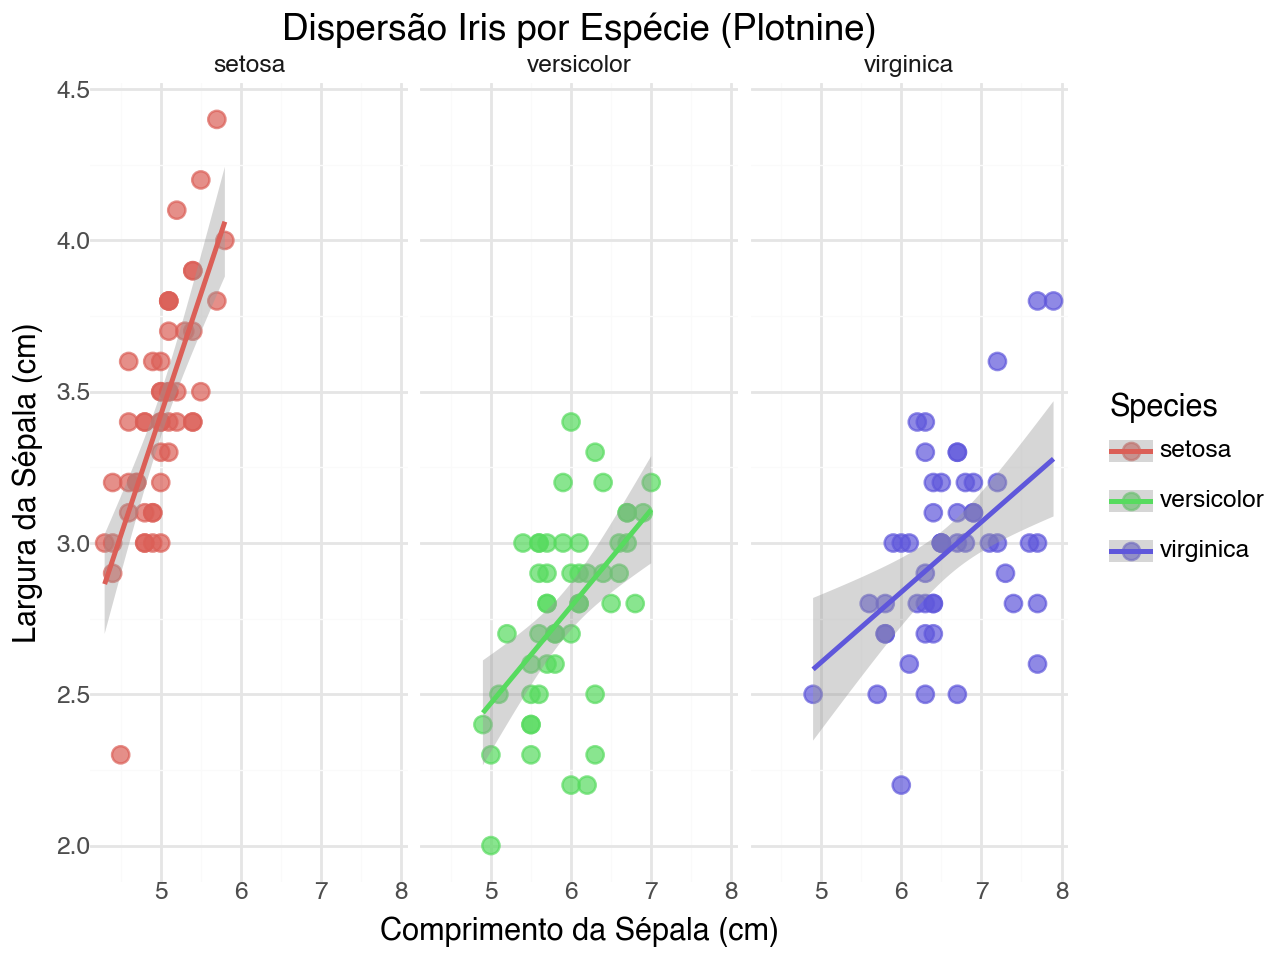

In [21]:
# Gráfico de Dispersão com linha de suavização e facetamento
p = (ggplot(df_iris, aes(x='Sepal.Length', y='Sepal.Width', color='Species')) +
     geom_point(alpha=0.7, size=3) +
     geom_smooth(method='lm') +  # Adiciona linha de regressão linear
     facet_wrap('~Species') +    # Facetas por espécie
     labs(title='Dispersão Iris por Espécie (Plotnine)',
          x='Comprimento da Sépala (cm)',
          y='Largura da Sépala (cm)') +
     theme_minimal())
display(p)  # Para exibir o gráfico

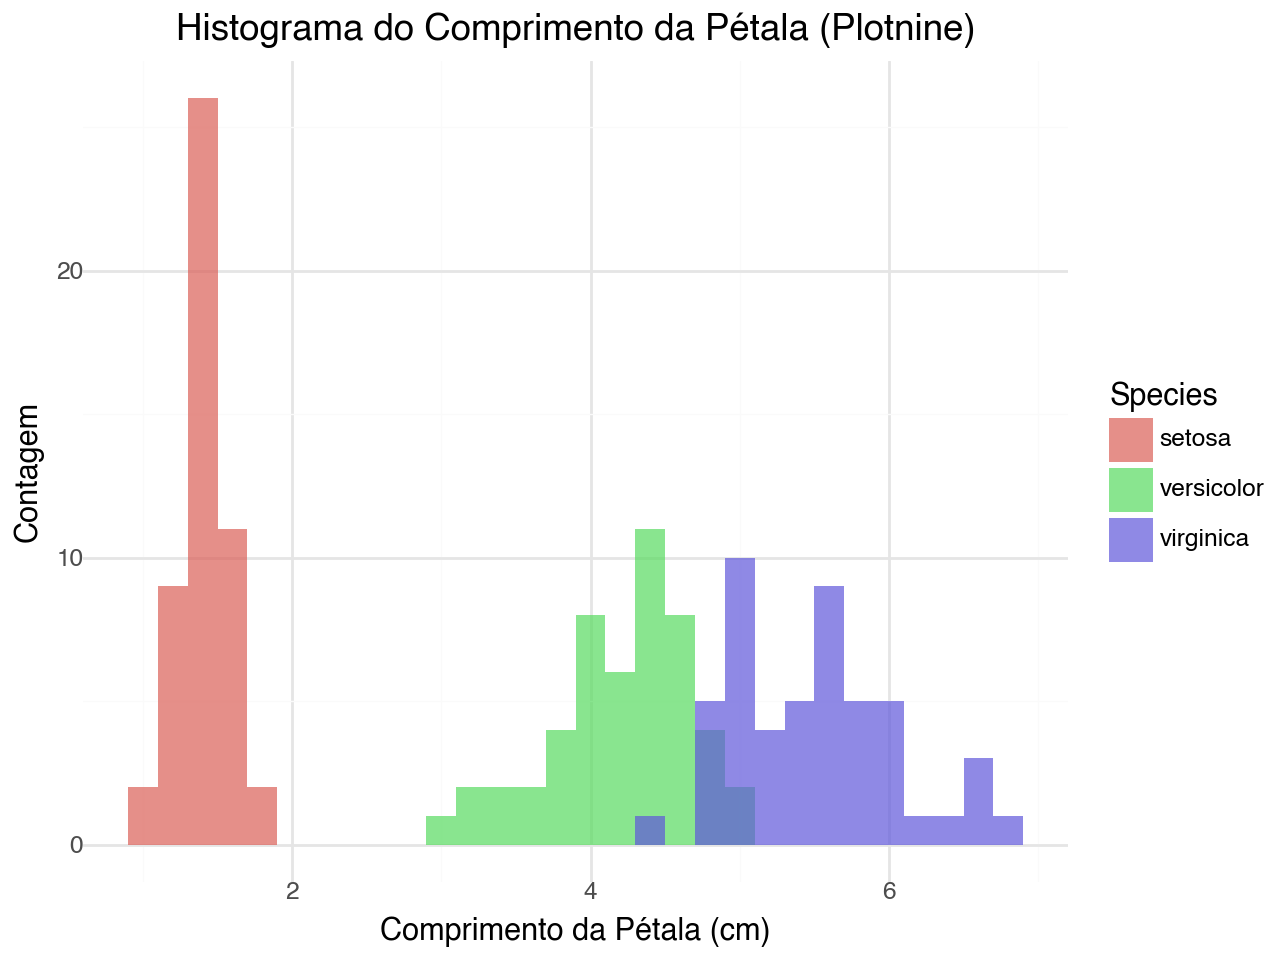

In [22]:
# Histograma com preenchimento por espécie
p_hist = (ggplot(df_iris, aes(x='Petal.Length', fill='Species')) +
          geom_histogram(binwidth=0.2, alpha=0.7, position='identity') +  # 'identity' para sobrepor
          labs(title='Histograma do Comprimento da Pétala (Plotnine)',
               x='Comprimento da Pétala (cm)',
               y='Contagem') +
          theme_minimal())
display(p_hist)

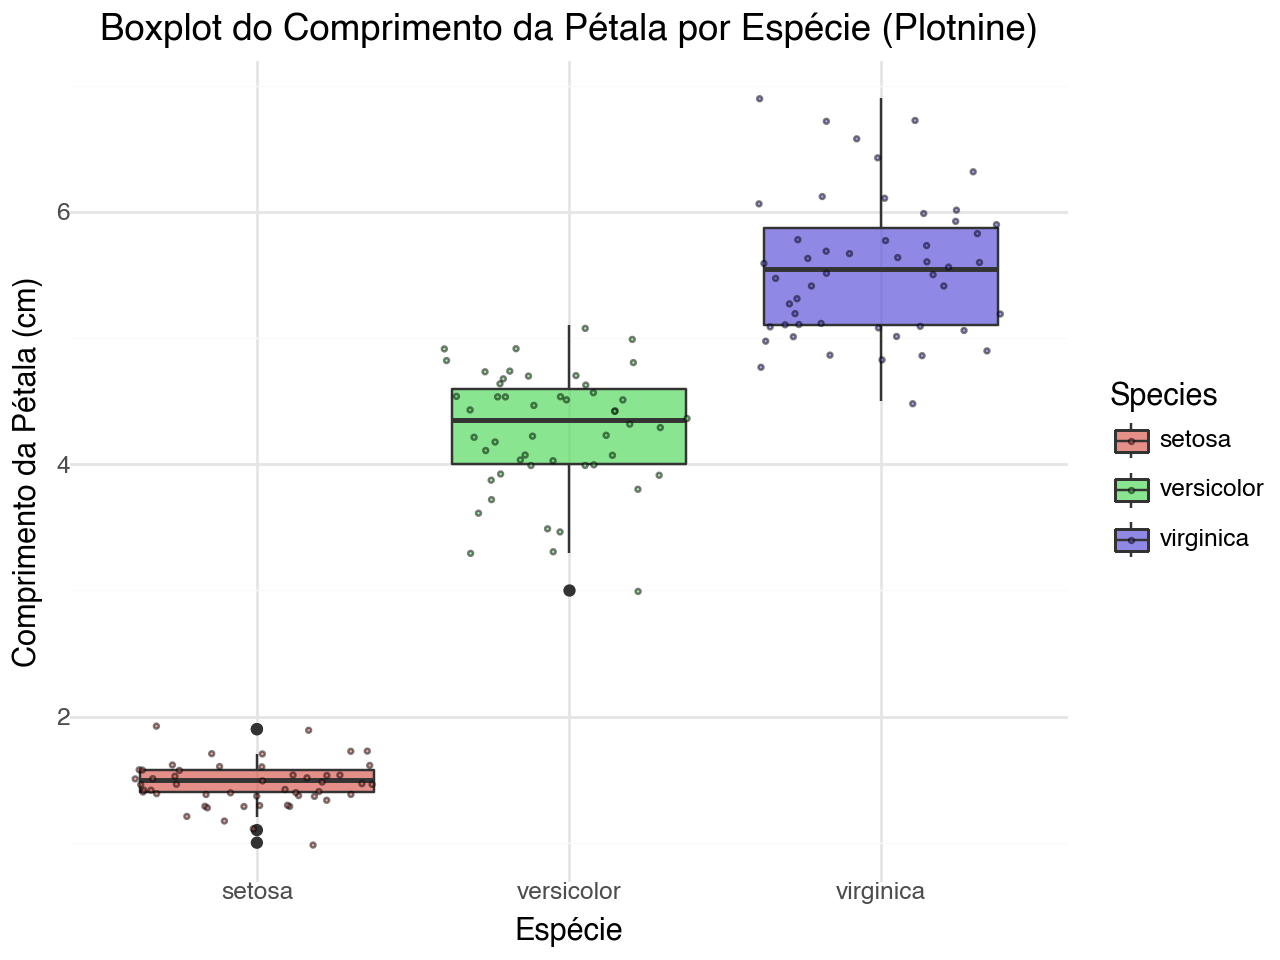

In [23]:
# Boxplot com jitter points
p_box = (ggplot(df_iris, aes(x='Species', y='Petal.Length', fill='Species')) +
         geom_boxplot(alpha=0.7) +
         geom_point(alpha=0.5, position='jitter', color='black', size=0.5) +
         labs(title='Boxplot do Comprimento da Pétala por Espécie (Plotnine)',
              x='Espécie',
              y='Comprimento da Pétala (cm)') +
         theme_minimal())
display(p_box)

## 5. Visualização Interativa

### 5.1 Plotly Express: Gráficos Interativos

In [24]:
# Gráfico de Dispersão 2D Interativo
fig_px_scatter = px.scatter(df_iris_renamed, x="sepal_width", y="sepal_length", color="species",
                           size="petal_width", hover_data=['petal_length'],
                           marginal_y="violin", marginal_x="box", trendline="ols",
                           title="Dispersão Interativa Iris (Plotly Express)")
# Adicionando rótulos de eixos mais informativos
fig_px_scatter.update_layout(
    xaxis_title="Largura da Sépala (cm)",
    yaxis_title="Comprimento da Sépala (cm)",
    legend_title="Espécie",
    font=dict(size=12)
)
fig_px_scatter.show()

In [25]:
# Gráfico de Dispersão 3D Interativo
fig_px_scatter_3d = px.scatter_3d(df_iris_renamed, x='sepal_length', y='sepal_width', z='petal_width',
                                 color='species', size='petal_length', opacity=0.7,
                                 title="Dispersão 3D Iris (Plotly Express)")
# Melhorando a aparência
fig_px_scatter_3d.update_layout(
    scene=dict(
        xaxis_title="Comprimento da Sépala (cm)",
        yaxis_title="Largura da Sépala (cm)",
        zaxis_title="Largura da Pétala (cm)",
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig_px_scatter_3d.show()

In [26]:
# Matriz de Gráficos de Dispersão Interativa
fig_px_scatter_matrix = px.scatter_matrix(df_iris_renamed,
                                        dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                        color="species", symbol="species",
                                        title="Matriz de Dispersão Interativa Iris (Plotly Express)",
                                        labels={
                                            "sepal_length": "Comprimento da Sépala (cm)",
                                            "sepal_width": "Largura da Sépala (cm)",
                                            "petal_length": "Comprimento da Pétala (cm)",
                                            "petal_width": "Largura da Pétala (cm)"
                                        })
# Melhorando a aparência da matriz
fig_px_scatter_matrix.update_layout(
    font=dict(size=11),
    height=800, width=800
)
fig_px_scatter_matrix.update_traces(diagonal_visible=False)  # Remove gráficos na diagonal
fig_px_scatter_matrix.show()

In [27]:
# Boxplot Interativo
fig_px_box = px.box(df_iris_renamed, x="species", y="sepal_length",
                   color="species", points="all",
                   notched=True,  # Adiciona entalhes para intervalos de confiança
                   title="Boxplot do Comprimento da Sépala por Espécie")
# Personalizando o boxplot
fig_px_box.update_layout(
    xaxis_title="Espécie",
    yaxis_title="Comprimento da Sépala (cm)",
    legend_title="Espécie",
    boxmode='group',
    font=dict(size=12)
)
fig_px_box.show()

In [28]:
# Histograma Interativo
fig_px_hist = px.histogram(df_iris_renamed, x="petal_length", color="species",
                          marginal="box",  # Adiciona boxplot na margem
                          hover_data=df_iris_renamed.columns,
                          barmode="overlay",  # Sobrepor histogramas para comparação
                          opacity=0.7,
                          title="Distribuição do Comprimento da Pétala")
# Personalizando o histograma
fig_px_hist.update_layout(
    xaxis_title="Comprimento da Pétala (cm)",
    yaxis_title="Contagem",
    legend_title="Espécie",
    font=dict(size=12)
)
fig_px_hist.show()

In [29]:
# Violin Plot Interativo
fig_px_violin = px.violin(df_iris_renamed, y="petal_width", x="species", color="species",
                         box=True,  # Adiciona boxplot dentro do violin plot
                         points="all",  # Mostra todos os pontos
                         hover_data=["sepal_length", "sepal_width", "petal_length"],
                         title="Distribuição da Largura da Pétala por Espécie")
# Personalizando o violin plot
fig_px_violin.update_layout(
    xaxis_title="Espécie",
    yaxis_title="Largura da Pétala (cm)",
    legend_title="Espécie",
    font=dict(size=12)
)
fig_px_violin.show()

In [30]:
# Gráfico de Densidade 2D
fig_px_density = px.density_contour(df_iris_renamed, x="sepal_length", y="sepal_width",
                                   color="species", marginal_x="histogram", marginal_y="histogram",
                                   title="Mapa de Densidade das Dimensões da Sépala")
# Personalizando o gráfico de densidade
fig_px_density.update_layout(
    xaxis_title="Comprimento da Sépala (cm)",
    yaxis_title="Largura da Sépala (cm)",
    legend_title="Espécie",
    font=dict(size=12)
)
fig_px_density.show()

### 5.2 Dashboard com Plotly

In [31]:
# Criando um dashboard com diversos tipos de visualização
fig_dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Dispersão", "Histograma", "Boxplot", "Radar"),
    specs=[[{"type": "scatter"}, {"type": "histogram"}],
           [{"type": "box"}, {"type": "polar"}]]
)

# Adicionando gráfico de dispersão
for species_name, group in df_iris_renamed.groupby('species'): # Corrigido para species_name
    fig_dashboard.add_trace(
        go.Scatter(
            x=group['sepal_length'], y=group['sepal_width'],
            mode='markers', name=species_name,
            hovertemplate='Sepal Length: %{x}<br>Sepal Width: %{y}',
            legendgroup=species_name
        ),
        row=1, col=1
    )

# Adicionando histograma
for species_name, group in df_iris_renamed.groupby('species'): # Corrigido para species_name
    fig_dashboard.add_trace(
        go.Histogram(
            x=group['petal_length'], name=species_name,
            opacity=0.7, legendgroup=species_name, showlegend=False
        ),
        row=1, col=2
    )

# Adicionando boxplot
for species_name, group in df_iris_renamed.groupby('species'): # Corrigido para species_name
    fig_dashboard.add_trace(
        go.Box(
            y=group['petal_width'], name=species_name,
            boxmean=True, legendgroup=species_name, showlegend=False
        ),
        row=2, col=1
    )

# Preparando dados para o gráfico radar
# Normalização das médias para radar chart
radar_data = df_iris_renamed.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean().reset_index()
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    max_val = radar_data[col].max()
    if max_val > 0: # Evitar divisão por zero
        radar_data[col] = radar_data[col] / max_val
    else:
        radar_data[col] = 0 # ou algum outro valor padrão se max_val for 0

# Adicionando gráfico radar
for species_name, group in radar_data.groupby('species'): # Corrigido para species_name
    fig_dashboard.add_trace(
        go.Scatterpolar(
            r=[group['sepal_length'].values[0], group['sepal_width'].values[0],
               group['petal_length'].values[0], group['petal_width'].values[0],
               group['sepal_length'].values[0]],  # Fechando o polígono
            theta=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Sepal Length'],
            fill='toself', name=species_name, legendgroup=species_name, showlegend=False
        ),
        row=2, col=2
    )

# Configurando o layout do dashboard
fig_dashboard.update_layout(
    title_text="Dashboard Interativo do Dataset Iris",
    height=800, width=1000,
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
)

# Atualizando eixos
fig_dashboard.update_xaxes(title_text="Comprimento da Sépala (cm)", row=1, col=1)
fig_dashboard.update_yaxes(title_text="Largura da Sépala (cm)", row=1, col=1)
fig_dashboard.update_xaxes(title_text="Comprimento da Pétala (cm)", row=1, col=2)
fig_dashboard.update_yaxes(title_text="Contagem", row=1, col=2)
fig_dashboard.update_xaxes(title_text="Espécie", row=2, col=1)
fig_dashboard.update_yaxes(title_text="Largura da Pétala (cm)", row=2, col=1)

fig_dashboard.show()

### 5.3 Gráficos com Bokeh

In [32]:
# Preparando os dados
# Usamos df_iris_renamed que já tem o formato padronizado
source = ColumnDataSource(df_iris_renamed)

# Adicionando ferramentas de interação
hover = HoverTool(
    tooltips=[
        ("Espécie", "@species"),
        ("Comp. Pétala", "@petal_length"),
        ("Larg. Pétala", "@petal_width"),
        ("Comp. Sépala", "@sepal_length"),
        ("Larg. Sépala", "@sepal_width"),
    ]
)

# Definindo esquema de cores para espécies
species_list = df_iris_renamed.species.unique().tolist()
num_species = len(species_list)
palette = Category10[max(3, num_species)] # Garante que a paleta tenha cores suficientes
color_map = factor_cmap('species', palette=palette[:num_species], factors=species_list)

# Criando um gráfico de dispersão com Bokeh
p_bokeh = figure(title="Visualização Iris (Bokeh)", tools=[hover, 'pan', 'wheel_zoom', 'reset', 'save'],
                height=500, width=700)
p_bokeh.xaxis.axis_label = "Comprimento da Pétala (cm)"
p_bokeh.yaxis.axis_label = "Largura da Pétala (cm)"

# Adicionando os pontos com cores por espécie
scatter = p_bokeh.scatter('petal_length', 'petal_width', source=source,
                         color=color_map, legend_field="species",
                         alpha=0.7, size=10, line_color="white")

# Personalizando a legenda
p_bokeh.legend.title = "Espécie"
p_bokeh.legend.location = "top_left"
p_bokeh.grid.grid_line_alpha = 0.3

# Exibindo o gráfico Bokeh
output_notebook() # Chamada necessária para Bokeh no notebook
show(p_bokeh)

Loading BokehJS ...

## 6. Visualização Dinâmica: Animações

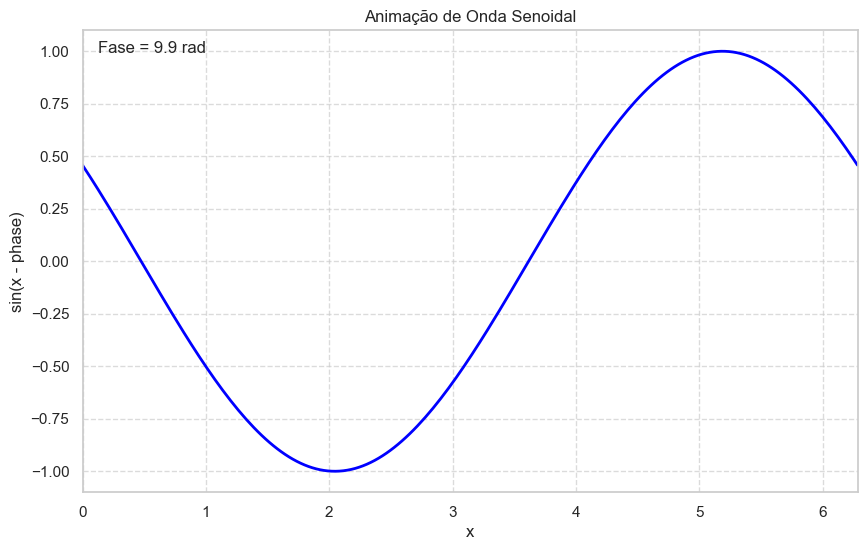

In [33]:
# Exemplo de animação com Matplotlib: Onda senoidal com fase variável
fig_anim, ax_anim = plt.subplots(figsize=(10, 6))
line, = ax_anim.plot([], [], lw=2, color='blue')  # Linha vazia inicialmente
ax_anim.set_xlim(0, 2*np.pi)
ax_anim.set_ylim(-1.1, 1.1)
ax_anim.set_xlabel('x')
ax_anim.set_ylabel('sin(x - phase)')
ax_anim.set_title('Animação de Onda Senoidal')
ax_anim.grid(True, linestyle='--', alpha=0.7)

# Texto para mostrar o valor da fase
phase_text = ax_anim.text(0.02, 0.95, '', transform=ax_anim.transAxes, fontsize=12)

def init():
    """Função de inicialização para FuncAnimation"""
    line.set_data([], [])
    phase_text.set_text('')
    return line, phase_text

def animate(i):
    """Função chamada para cada frame da animação"""
    x = np.linspace(0, 2*np.pi, 200)
    phase = 0.1 * i
    y = np.sin(x - phase)
    line.set_data(x, y)
    phase_text.set_text(f'Fase = {phase:.1f} rad')
    return line, phase_text

# frames: número de quadros; interval: milissegundos entre quadros
# blit=True: otimiza redesenhando apenas o que mudou
anim = animation.FuncAnimation(fig_anim, animate, init_func=init,
                              frames=100, interval=50, blit=True)

# Para exibir no Jupyter Notebook:
HTML(anim.to_html5_video())

## 7. Visualização de Séries Temporais

In [34]:
# Gerando dados de série temporal simulados
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
np.random.seed(42)
ts_df = pd.DataFrame({
    'data': dates,
    'valor': np.cumsum(np.random.randn(len(dates))) + 100,  # Passeio aleatório
    'tendencia': np.linspace(100, 150, len(dates)),  # Tendência linear
    'sazonalidade': 10 * np.sin(np.linspace(0, 2*np.pi * 12, len(dates)))  # Componente sazonal
})

# Adicionando componentes
ts_df['composto'] = ts_df['tendencia'] + ts_df['sazonalidade'] + np.random.randn(len(dates)) * 5

In [35]:
# Visualização da série temporal
fig_ts = px.line(
    ts_df, x='data', y=['valor', 'composto'],
    title='Análise de Série Temporal',
    labels={'data': 'Data', 'value': 'Valor', 'variable': 'Série'}
)

# Personalização do gráfico de séries temporais
fig_ts.update_layout(
    xaxis_title="Data",
    yaxis_title="Valor",
    legend_title="Componente",
    hovermode="x unified"
)
fig_ts.show()

In [36]:
# Visualização de decomposição
fig_decomp = px.line(
    ts_df, x='data', y=['tendencia', 'sazonalidade'],
    title='Decomposição da Série Temporal',
    labels={'data': 'Data', 'value': 'Componente', 'variable': 'Tipo'}
)
fig_decomp.update_layout(
    xaxis_title="Data",
    yaxis_title="Valor",
    legend_title="Componente",
    hovermode="x unified"
)
fig_decomp.show()

In [37]:
# Gráfico de calendário para dados diários (heatmap)
# Primeiro, vamos processar os dados para formato de calendário
ts_df['month'] = ts_df['data'].dt.month_name() # Nome do mês para melhor leitura
ts_df['day_of_week'] = ts_df['data'].dt.day_name() # Nome do dia da semana
ts_df['week_of_year'] = ts_df['data'].dt.isocalendar().week
ts_df['day_of_month'] = ts_df['data'].dt.day

# Criando um heatmap de calendário para o primeiro trimestre
q1_data = ts_df[ts_df['data'].dt.month <= 3].copy() # Usar .copy() para evitar SettingWithCopyWarning

# Precisamos reestruturar os dados para o heatmap de calendário com Plotly Express.
# Plotly não tem um heatmap de calendário direto como o da biblioteca `calmap`.
# Uma alternativa é usar `px.imshow` ou `px.density_heatmap` com eixos customizados.

# Para simplificar, faremos um heatmap de atividade por dia da semana e mês.
calendar_heatmap_data = q1_data.groupby(['month', 'day_of_week'])['valor'].mean().unstack()
# Ordenar os dias da semana e meses
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_months = ['January', 'February', 'March']
calendar_heatmap_data = calendar_heatmap_data.reindex(index=ordered_months, columns=ordered_days)

fig_calendar = px.imshow(
    calendar_heatmap_data,
    labels=dict(x="Dia da Semana", y="Mês", color="Valor Médio"),
    title='Mapa de Calor de Atividade Média por Dia/Mês (Q1 2022)',
    color_continuous_scale='Viridis'
)
fig_calendar.update_xaxes(side="top")
fig_calendar.show()

## 8. Demonstração de Boas Práticas em Visualização

In [38]:
# Demonstração de Boas Práticas vs. Práticas Ruins em Visualização

# Configuração inicial - resetar estilo para comparação
plt.style.use('default') # Usar estilo padrão para ver as diferenças mais claramente
plt.rcParams.update(plt.rcParamsDefault) # Resetar todas as rcParams

fig_bp, axes_bp = plt.subplots(2, 2, figsize=(14, 12)) # Renomeado fig e axes

In [39]:
# Exemplo 1: Bom vs. Ruim para Gráfico de Barras
# Prática Ruim - Sem ordenar, cores inconsistentes
species_counts_bp = df_iris['Species'].value_counts() # Renomeado
axes_bp[0, 0].bar(species_counts_bp.index, species_counts_bp.values,
                  color=['#FF6347', '#3CB371', '#1E90FF']) # Cores aleatórias
axes_bp[0, 0].set_title('Ruim: Barras Não Ordenadas, Cores Distrativas')
axes_bp[0, 0].set_xlabel('Espécie')
axes_bp[0, 0].set_ylabel('Contagem')

# Prática Boa - Ordenado por valor, cores consistentes, limpo
species_counts_sorted_bp = species_counts_bp.sort_values(ascending=False) # Renomeado
axes_bp[0, 1].bar(species_counts_sorted_bp.index, species_counts_sorted_bp.values,
                  color='skyblue')
axes_bp[0, 1].set_title('Bom: Barras Ordenadas, Cor Única')
axes_bp[0, 1].set_xlabel('Espécie')
axes_bp[0, 1].set_ylabel('Contagem')
# Adicionando valores nas barras
for i, v in enumerate(species_counts_sorted_bp.values):
    axes_bp[0, 1].text(i, v + 0.5, str(v), ha='center')
axes_bp[0, 1].spines['top'].set_visible(False)
axes_bp[0, 1].spines['right'].set_visible(False)

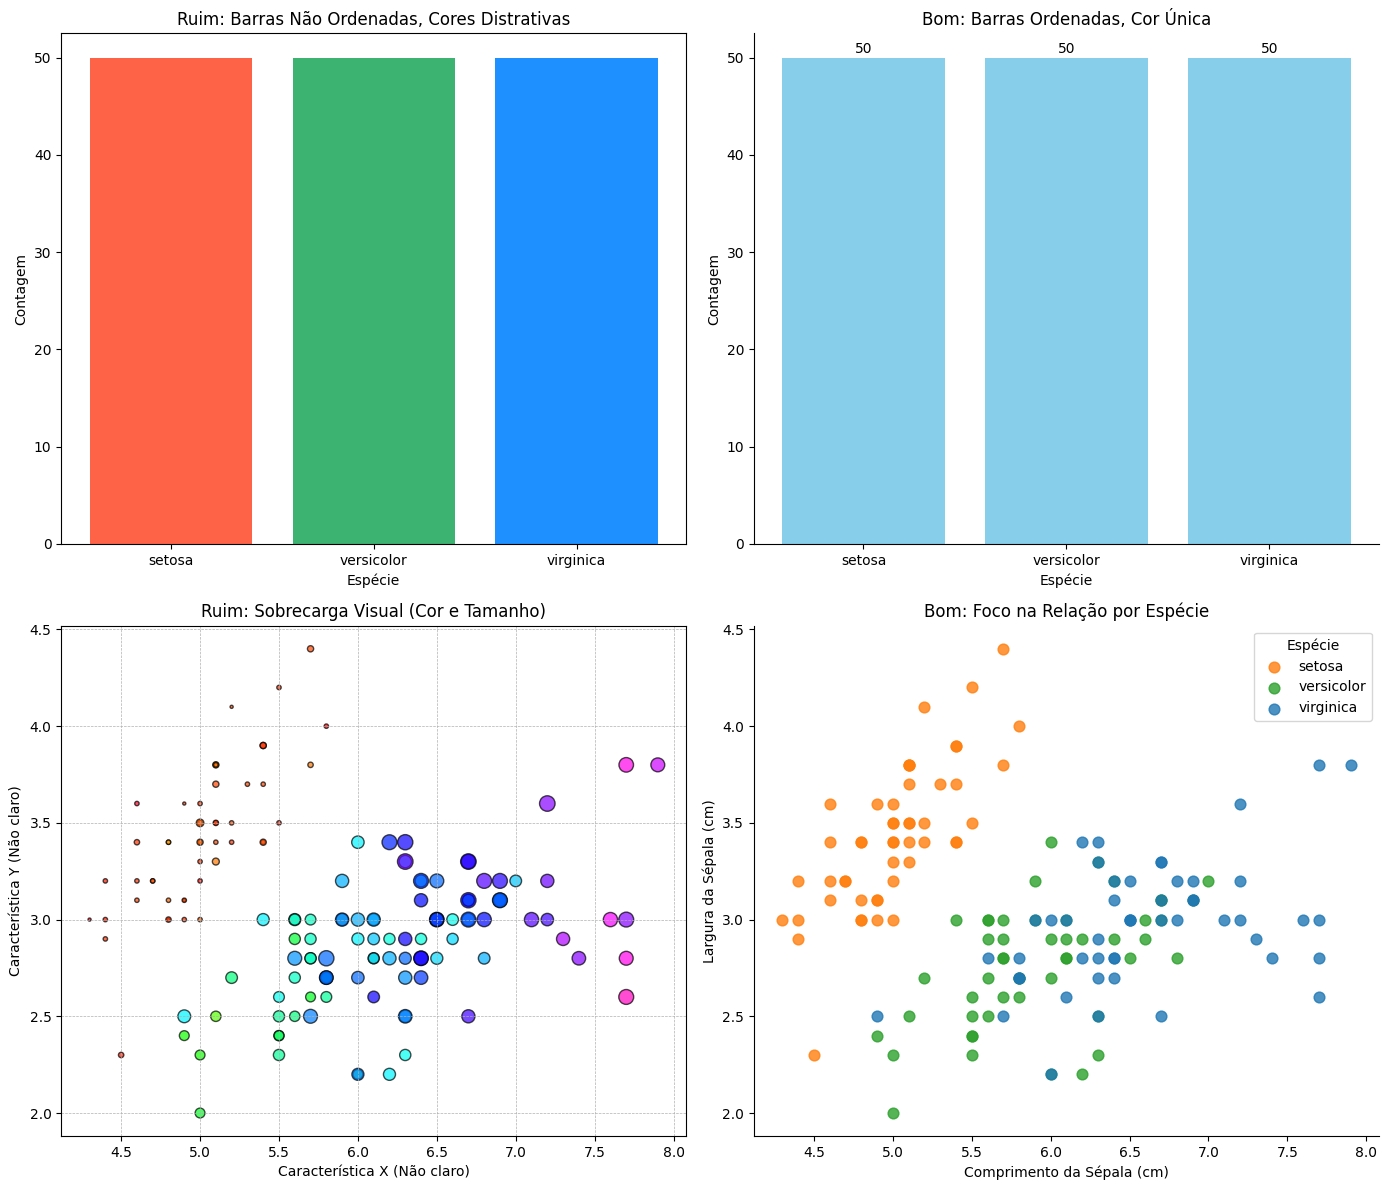

In [40]:
# Exemplo 2: Bom vs. Ruim para Gráfico de Dispersão
# Prática Ruim - Sobrecargo de informações, eixos sem significado claro
axes_bp[1, 0].scatter(df_iris['Sepal.Length'], df_iris['Sepal.Width'],
                     c=df_iris['Petal.Length'], s=df_iris['Petal.Width']*50, # Aumentado s para visibilidade
                     cmap='gist_rainbow', alpha=0.7, edgecolors='black')
axes_bp[1, 0].set_title('Ruim: Sobrecarga Visual (Cor e Tamanho)')
axes_bp[1, 0].set_xlabel('Característica X (Não claro)')
axes_bp[1, 0].set_ylabel('Característica Y (Não claro)')
axes_bp[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)
# axes_bp[1, 0].set_xticks(np.arange(4, 8.1, 0.5)) # Removido para não poluir
# axes_bp[1, 0].set_yticks(np.arange(1.5, 5.1, 0.5))

# Prática Boa - Informação clara, foco na mensagem principal
colors_species = {'setosa':'#FF7F0E', 'versicolor':'#2CA02C', 'virginica':'#1F77B4'} # Paleta consistente
for species_name, group in df_iris.groupby('Species'): # Corrigido para species_name
    axes_bp[1, 1].scatter(group['Sepal.Length'], group['Sepal.Width'],
                          label=species_name, alpha=0.8, s=60, color=colors_species[species_name.lower()])
axes_bp[1, 1].set_title('Bom: Foco na Relação por Espécie')
axes_bp[1, 1].set_xlabel('Comprimento da Sépala (cm)')
axes_bp[1, 1].set_ylabel('Largura da Sépala (cm)')
axes_bp[1, 1].legend(title='Espécie')
axes_bp[1, 1].spines['top'].set_visible(False)
axes_bp[1, 1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()